# The 3 Body Problem
----------------------------

### 1. Introduction
The 3-body problem is a classical problem in celestial mechanics that describes the motion of three massive bodies interacting with each other under the influence of gravity. This problem has significant applications in understanding the orbits of planets, moons, and artificial satellites.

The goal is to predict the future **positions and velocities** of the three bodies given their initial states.

### 2. Assumptions and Simplifications
* **Isolated System**: The system consists only of the two interacting bodies, with no external forces acting on them.
* **Point Masses**: The bodies are treated as point masses, having all their mass concentrated at a single point.
* **Newtonian Gravity**: The force between the two bodies is described by Newton's law of universal gravitation.

### 3. Mathematical formulation
A planet is presented as a particle that has a position $\vec{p}$. $F_{p_i \ / \ p_j}$ is the gravitational force that $p_i$ is exerting on $p_j$

$$ \vec{F}_{p_i \ / \ p_j} = G \frac{m_i \ m_j}{|\vec{p}_i - \vec{p}_j|^3} \left(\vec{p}_i - \vec{p}_j \right) $$

Here $\vec{p} = [p_x, p_y, p_z]$ contains the coordinates of the planet.

By using Newton's second law of motion on each planet:

* On planet 1 ($\vec{p}_1$):
$$ m_1 \frac{d^2 \vec{p}_1}{dt^2} = G \left(\frac{m_3 \ m_1}{|\vec{p}_3 - \vec{p}_1|^3} \left(\vec{p}_3 - \vec{p}_1 \right)  +   \frac{m_2 \ m_1}{|\vec{p}_2 - \vec{p}_1|^3} \left(\vec{p} _2 - \vec{p}_1 \right) \right)$$

resulting in:

$$\boxed{ \frac{d^2 \vec{p}_1}{dt^2} = G m_3 \frac{\vec{p}_3 - \vec{p}_1}{|\vec{p}_3 - \vec{p}_1|^3} +  G m_2 \frac{\vec{p}_2 - \vec{p}_1}{|\vec{p}_2 - \vec{p}_1|^3} } $$

The work is repeated for the remaining planets ($\vec{p}_2$ and $\vec{p}_3$), finally obtaining the system of odinary differential equations ODE's:


$$
\boxed{
\begin{array}{c}
\displaystyle \frac{d^2 \vec{p}_1}{dt^2} = G m_3 \frac{\vec{p}_3 - \vec{p}_1}{|\vec{p}_3 - \vec{p}_1|^3} +  G m_2 \frac{\vec{p}_2 - \vec{p}_1}{|\vec{p}_2 - \vec{p}_1|^3} \\[0.2cm]
\displaystyle \frac{d^2 \vec{p}_2}{dt^2} = G m_3 \frac{\vec{p}_3 - \vec{p}_2}{|\vec{p}_3 - \vec{p}_2|^3} +  G m_1 \frac{\vec{p}_1 - \vec{p}_2}{|\vec{p}_2 - \vec{p}_2|^3}\\[0.2cm]
\displaystyle \frac{d^2 \vec{p}_3}{dt^2} = G m_1 \frac{\vec{p}_1 - \vec{p}_3}{|\vec{p}_1 - \vec{p}_3|^3} +  G m_2 \frac{\vec{p}_2 - \vec{p}_3}{|\vec{p}_2 - \vec{p}_3|^3}
\end{array}
} 
$$


### 4. Packaging our problem for Python
#### Dimensionless version
We might need to rescale our problem to simplify and allowing more stability. This by defining new variables:

- $\vec{p'} = \vec{p}/L$
- $m' = m/M$
- $t' = t \sqrt{GM/L^3}$

Were $\vec{p'}$, $m'$ and $t'$ are dimensionless variables, and $L$ and $M$ are reference values.


By replacing the rescaled variables we obtain the following equation:

$$
\displaystyle \frac{d^2 (L \vec{p'}_1)}{d(\frac{t'}{\sqrt{GM/L^3}})^2} = G m_3 \frac{L(\vec{p'}_3 - \vec{p'}_1)}{|L(\vec{p'}_3 - \vec{p'}_1)|^3} +  G m_2 \frac{L(\vec{p'}_2 - \vec{p'}_1)}{|L(\vec{p'}_2 - \vec{p'}_1)|^3}
$$

Leading to:

$$\displaystyle \frac{L \ GM}{L^3}\frac{d^2 \vec{p'}_1}{dt'^2} = G m_3 \frac{L}{L^3} \frac{\vec{p'}_3 - \vec{p'}_1}{|\vec{p'}_3 - \vec{p'}_1|^3} +  G m_2 \frac{L}{L^3} \frac{\vec{p'}_2 - \vec{p'}_1}{|\vec{p'}_2 - \vec{p'}_1|^3}$$

After simplifying:

$$
\boxed{
\displaystyle \frac{d^2 \vec{p'}_1}{dt'^2} = \frac{m_3}{M} \frac{\vec{p'}_3 - \vec{p'}_1}{|\vec{p'}_3 - \vec{p'}_1|^3} + \frac{m_2}{M}  \frac{\vec{p'}_2 - \vec{p'}_1}{|\vec{p'}_2 - \vec{p'}_1|^3}
}
$$

Finally we obtain the rescaled system of ODE:

$$
\boxed{
\begin{array}{c}
\displaystyle \frac{d^2 \vec{p'}_1}{dt'^2} = m_3' \frac{\vec{p'}_3 - \vec{p'}_1}{|\vec{p'}_3 - \vec{p'}_1|^3} + m_2'  \frac{\vec{p'}_2 - \vec{p'}_1}{|\vec{p'}_2 - \vec{p'}_1|^3} \\[0.2cm]
\displaystyle \frac{d^2 \vec{p'}_2}{dt'^2} = m_3' \frac{\vec{p'}_3 - \vec{p'}_2}{|\vec{p'}_3 - \vec{p'}_2|^3} + m_1'  \frac{\vec{p'}_1 - \vec{p'}_2}{|\vec{p'}_1 - \vec{p'}_2|^3}\\[0.2cm]
\displaystyle \frac{d^2 \vec{p'}_3}{dt'^2} = m_1' \frac{\vec{p'}_1 - \vec{p'}_3}{|\vec{p'}_1 - \vec{p'}_3|^3} + m_2'  \frac{\vec{p'}_2 - \vec{p'}_3}{|\vec{p'}_2 - \vec{p'}_3|^3}
\end{array}
} 
$$

#### Transforming into a system of first ODE's

By defining new functions $\vec{f}_1$, $\vec{f}_2$ and $\vec{f}_3$ defined by:

$$ \vec{f}_1 = \frac{d \vec{p'}_1}{dt} $$
$$ \vec{f}_2 = \frac{d \vec{p'}_2}{dt} $$
$$ \vec{f}_3 = \frac{d \vec{p'}_3}{dt} $$


The system of first order ODE is obtained:
$$
\boxed{
\begin{array}{l}
\vec{f}_1 & = & \displaystyle \frac{d \vec{p'}_1}{dt}\\
\vec{f}_2 & = & \displaystyle \frac{d \vec{p'}_2}{dt}\\
\vec{f}_3 & = & \displaystyle \frac{d \vec{p'}_3}{dt}\\
\displaystyle \frac{d \vec{f}_1}{dt} & = & \displaystyle m_3' \frac{\vec{p'}_3 - \vec{p'}_1}{|\vec{p'}_3 - \vec{p'}_1|^3} +  m_2' \frac{\vec{p'}_2 - \vec{p'}_1}{|\vec{p'}_2 - \vec{p'}_1|^3} \\[0.2cm]
\displaystyle \frac{d \vec{f}_2}{dt} & = & \displaystyle m_3' \frac{\vec{p'}_3 - \vec{p'}_2}{|\vec{p'}_3 - \vec{p'}_2|^3} +  m_1' \frac{\vec{p'}_1 - \vec{p'}_2}{|\vec{p'}_2 - \vec{p'}_2|^3}\\[0.2cm]
\displaystyle \frac{d \vec{f}_3}{dt} & = & \displaystyle m_1' \frac{\vec{p'}_1 - \vec{p'}_3}{|\vec{p'}_1 - \vec{p'}_3|^3} +  m_2' \frac{\vec{p'}_2 - \vec{p'}_3}{|\vec{p'}_2 - \vec{p'}_3|^3}
\end{array}
} 
$$

We are looking to solve for $\vec{p'}_1$, $\vec{p'}_2$ and $\vec{p'}_3$. Where at $t' = 0$, we have informations about the initial position and velocities of the planets (Initial Conditions | IVP):

* $\displaystyle \vec{p'}_{i_{t'=0}} = \vec{p'}_{i_{0}} = \left[p'_{_i{x_0}}, p'_{_i{y_0}}, p'_{_i{z_0}} \right]$
* $\displaystyle \vec{v'}_{i_{t'=0}} = \vec{v'}_{i_{0}} = \left[v'_{_i{x_0}}, v'_{_i{y_0}}, v'_{_i{z_0}} \right]$
* $\vec{p'}_i$ position vector, $\vec{v'}_i$ velocity vector for $i=1, 2, 3$ (3 here representing the number of planets interacting with each other.

# Python Implementation
-----------------------

#### 1. Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

#### 2. Initial Conditions & Constants

In [2]:
m1 = 1.0
m2 = 1.0
m3 = 1.0

# Position
inital_position_1 =  [1.0,  0.0,  1.0]
inital_position_2 =  [1.0,  1.0,  0.0]
inital_position_3 =  [0.0,   1.0, 1.0]

# Velocity
inital_velocity_1 =  [0.0, 0.0, -1.0]
inital_velocity_2 =  [0.0, 0.0, 1.0]
inital_velocity_3 =  [0.0, 0.0, -0.6]

initial_conditions = np.array([
    inital_position_1, inital_position_2, inital_position_3,
    inital_velocity_1, inital_velocity_2, inital_velocity_3
]).ravel()

#### 3. Defining our system of first order ODE's in Python:

In [3]:
def system_odes(t, S, m1, m2, m3):
    p1, p2, p3 = S[0:3], S[3:6], S[6:9]
    dp1_dt, dp2_dt, dp3_dt = S[9:12], S[12:15], S[15:18]

    f1, f2, f3 = dp1_dt, dp2_dt, dp3_dt

    df1_dt = m3*(p3 - p1)/np.linalg.norm(p3 - p1)**3 + m2*(p2 - p1)/np.linalg.norm(p2 - p1)**3
    df2_dt = m3*(p3 - p2)/np.linalg.norm(p3 - p2)**3 + m1*(p1 - p2)/np.linalg.norm(p1 - p2)**3
    df3_dt = m1*(p1 - p3)/np.linalg.norm(p1 - p3)**3 + m2*(p2 - p3)/np.linalg.norm(p2 - p3)**3

    return np.array([f1, f2, f3, df1_dt, df2_dt, df3_dt]).ravel()

#### 4. Solving our problem numerically

In [4]:
time_s, time_e = 0, 10
t_points = np.linspace(time_s, time_e, 1001)

solution = solve_ivp(
    fun=system_odes,
    t_span=(time_s, time_e),
    y0=initial_conditions,
    t_eval=t_points,
    args=(m1, m2, m3)
)


t_sol = solution.t
p1x_sol = solution.y[0]
p1y_sol = solution.y[1]
p1z_sol = solution.y[2]

p2x_sol = solution.y[3]
p2y_sol = solution.y[4]
p2z_sol = solution.y[5]

p3x_sol = solution.y[6]
p3y_sol = solution.y[7]
p3z_sol = solution.y[8]

#### 5. Plotting the results

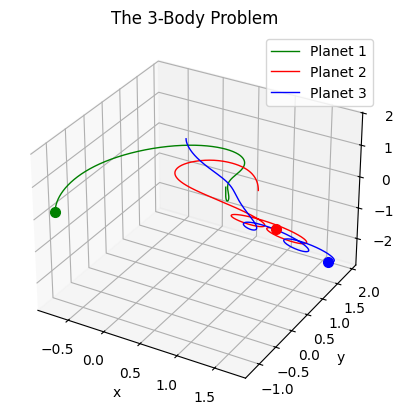

In [5]:
# -------  Plotting the solutions ------- #

fig, ax = plt.subplots(subplot_kw={"projection":"3d"})

planet1_plt, = ax.plot(p1x_sol, p1y_sol, p1z_sol, 'green', label='Planet 1', linewidth=1)
planet2_plt, = ax.plot(p2x_sol, p2y_sol, p2z_sol, 'red', label='Planet 2', linewidth=1)
planet3_plt, = ax.plot(p3x_sol, p3y_sol, p3z_sol, 'blue',label='Planet 3', linewidth=1)

planet1_dot, = ax.plot([p1x_sol[-1]], [p1y_sol[-1]], [p1z_sol[-1]], 'o', color='green', markersize=7)
planet2_dot, = ax.plot([p2x_sol[-1]], [p2y_sol[-1]], [p2z_sol[-1]], 'o', color='red', markersize=7)
planet3_dot, = ax.plot([p3x_sol[-1]], [p3y_sol[-1]], [p3z_sol[-1]], 'o', color='blue', markersize=7)


ax.set_title("The 3-Body Problem")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid()
plt.legend()
plt.show()


# Animating the Solution

In [7]:
from matplotlib.animation import FuncAnimation

In [8]:
def update(frame):
    lower_lim = max(0, frame - 300)
    print(f"Progress: {(frame+1)/len(t_points):.1%} | 100.0 %", end='\r')

    x_current_1 = p1x_sol[lower_lim:frame+1]
    y_current_1 = p1y_sol[lower_lim:frame+1]
    z_current_1 = p1z_sol[lower_lim:frame+1]

    x_current_2 = p2x_sol[lower_lim:frame+1]
    y_current_2 = p2y_sol[lower_lim:frame+1]
    z_current_2 = p2z_sol[lower_lim:frame+1]

    x_current_3 = p3x_sol[lower_lim:frame+1]
    y_current_3 = p3y_sol[lower_lim:frame+1]
    z_current_3 = p3z_sol[lower_lim:frame+1]

    planet1_plt.set_data(x_current_1, y_current_1)  
    planet1_plt.set_3d_properties(z_current_1)

    planet1_dot.set_data([x_current_1[-1]], [y_current_1[-1]])
    planet1_dot.set_3d_properties([z_current_1[-1]])



    planet2_plt.set_data(x_current_2, y_current_2)  
    planet2_plt.set_3d_properties(z_current_2)

    planet2_dot.set_data([x_current_2[-1]], [y_current_2[-1]])
    planet2_dot.set_3d_properties([z_current_2[-1]])



    planet3_plt.set_data(x_current_3, y_current_3)  
    planet3_plt.set_3d_properties(z_current_3)

    planet3_dot.set_data([x_current_3[-1]], [y_current_3[-1]])
    planet3_dot.set_3d_properties([z_current_3[-1]])


    return planet1_plt, planet1_dot, planet2_plt, planet2_dot, planet3_plt, planet3_dot 


saving the animation as a gif file

In [ ]:
animation = FuncAnimation(fig, update, frames=range(0, len(t_points), 2), interval=10, blit=True)
animation.save(f"3_body_problem.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.
